In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.tree import plot_tree


df = pd.read_csv("/content/Studentmentalhealth.csv")
df.head()

df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 11 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Timestamp                                     101 non-null    object 
 1   Choose your gender                            101 non-null    object 
 2   Age                                           100 non-null    float64
 3   What is your course?                          101 non-null    object 
 4   Your current year of Study                    101 non-null    object 
 5   What is your CGPA?                            101 non-null    object 
 6   Marital status                                101 non-null    object 
 7   Do you have Depression?                       101 non-null    object 
 8   Do you have Anxiety?                          101 non-null    object 
 9   Do you have Panic attack?                     101 non-null    obj

,Age
count,100.00000
mean,20.53000
std,2.49628
min,18.00000
25%,18.00000
50%,19.00000
75%,23.00000
max,24.00000


In [ ]:
df.shape  #101 rows and 11 columns

(101, 11)

In [ ]:
df.isna().sum()   #check for null values

Timestamp                                       0
Choose your gender                              0
Age                                             1
What is your course?                            0
Your current year of Study                      0
What is your CGPA?                              0
Marital status                                  0
Do you have Depression?                         0
Do you have Anxiety?                            0
Do you have Panic attack?                       0
Did you seek any specialist for a treatment?    0
dtype: int64

**NULL VALUE FILLING**

In [ ]:
median  = df["Age"].median()
df["Age"]= df["Age"].fillna(median)
df.head(50)



,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No
5,8/7/2020 12:31,Male,19.0,Engineering,year 2,3.50 - 4.00,No,No,No,Yes,No
6,8/7/2020 12:32,Female,23.0,Pendidikan islam,year 2,3.50 - 4.00,Yes,Yes,No,Yes,No
7,8/7/2020 12:33,Female,18.0,BCS,year 1,3.50 - 4.00,No,No,Yes,No,No
8,8/7/2020 12:35,Female,19.0,Human Resources,year 2,2.50 - 2.99,No,No,No,No,No
9,8/7/2020 12:39,Male,18.0,Irkhs,year 1,3.50 - 4.00,No,No,Yes,Yes,No


In [ ]:
df.isna().sum()  #No null values

Timestamp                                       0
Choose your gender                              0
Age                                             0
What is your course?                            0
Your current year of Study                      0
What is your CGPA?                              0
Marital status                                  0
Do you have Depression?                         0
Do you have Anxiety?                            0
Do you have Panic attack?                       0
Did you seek any specialist for a treatment?    0
dtype: int64

In [ ]:

df["Do you have Depression?"].value_counts()

No     66
Yes    35
Name: Do you have Depression?, dtype: int64

**CONVeRT CATEGORICAL TO NUMERICAL DATA**

In [ ]:
df1 = df.copy(deep= True) #Copies the data and changes dont apply in original data
mapping = {"Female":1, "Male":0}  #gender
mapping1 = {"year 1":1, "year 2":2, "year 3": 3, "year 4": 4}  #year of study
mapping2 = {"No":0, "Yes": 1}  #marital status, do you have anxiety,depression,panic attack,seek specialist?
mapping3 = {"3.00 - 3.49" : 3, "3.50 - 4.00": 4, "3.50 - 4.00 ": 4, "2.50 - 2.99":3, "2.00 - 2.49": 2, "0 - 1.99" : 1}  #CGPA

df1["Choose your gender"] = df1["Choose your gender"].map(mapping)
df1["Your current year of Study"] = df1["Your current year of Study"].map(mapping1)
df1["Marital status"] = df1["Marital status"].map(mapping2)
df1["Do you have Depression?"] = df1["Do you have Depression?"].map(mapping2)
df1["Do you have Anxiety?"] = df1["Do you have Anxiety?"].map(mapping2)
df1["Do you have Panic attack?"] = df1["Do you have Panic attack?"].map(mapping2)
df1["Did you seek any specialist for a treatment?"] = df1["Did you seek any specialist for a treatment?"].map(mapping2)
df1["What is your CGPA?"] = df1["What is your CGPA?"].map(mapping3)

df1.head(40)

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,1,18.0,Engineering,1,3,0,1,0,1,0
1,8/7/2020 12:04,0,21.0,Islamic education,2,3,0,0,1,0,0
2,8/7/2020 12:05,0,19.0,BIT,1,3,0,1,1,1,0
3,8/7/2020 12:06,1,22.0,Laws,3,3,1,1,0,0,0
4,8/7/2020 12:13,0,23.0,Mathemathics,4,3,0,0,0,0,0
5,8/7/2020 12:31,0,19.0,Engineering,2,4,0,0,0,1,0
6,8/7/2020 12:32,1,23.0,Pendidikan islam,2,4,1,1,0,1,0
7,8/7/2020 12:33,1,18.0,BCS,1,4,0,0,1,0,0
8,8/7/2020 12:35,1,19.0,Human Resources,2,3,0,0,0,0,0
9,8/7/2020 12:39,0,18.0,Irkhs,1,4,0,0,1,1,0


**CONVERT COURSE COLUMN TO NUMERICAL USING LABEL ENCODER**

In [ ]:

le = LabelEncoder()
col = ["What is your course?"]

for f in col:
  df1[f] = le.fit_transform(df1[f])
df1.head(20)

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,1,18.0,17,1,3,0,1,0,1,0
1,8/7/2020 12:04,0,21.0,25,2,3,0,0,1,0,0
2,8/7/2020 12:05,0,19.0,4,1,3,0,1,1,1,0
3,8/7/2020 12:06,1,22.0,33,3,3,1,1,0,0,0
4,8/7/2020 12:13,0,23.0,37,4,3,0,0,0,0,0
5,8/7/2020 12:31,0,19.0,17,2,4,0,0,0,1,0
6,8/7/2020 12:32,1,23.0,41,2,4,1,1,0,1,0
7,8/7/2020 12:33,1,18.0,2,1,4,0,0,1,0,0
8,8/7/2020 12:35,1,19.0,20,2,3,0,0,0,0,0
9,8/7/2020 12:39,0,18.0,23,1,4,0,0,1,1,0


**SPLITTING X-Train and Y-Train**

In [ ]:
x = df1.drop(columns = ['Timestamp', 'Do you have Depression?'],axis = 1)
y = df1["Do you have Depression?"]

In [ ]:
print(x)

     Choose your gender   Age  What is your course?  \
0                     1  18.0                    17   
1                     0  21.0                    25   
2                     0  19.0                     4   
3                     1  22.0                    33   
4                     0  23.0                    37   
..                  ...   ...                   ...   
96                    1  21.0                     2   
97                    0  18.0                    17   
98                    1  19.0                    38   
99                    1  23.0                    39   
100                   0  20.0                     7   

     Your current year of Study  What is your CGPA?  Marital status  \
0                             1                   3               0   
1                             2                   3               0   
2                             1                   3               0   
3                             3                   3    

In [ ]:
print(y)

0      1
1      0
2      1
3      1
4      0
      ..
96     0
97     1
98     1
99     0
100    0
Name: Do you have Depression?, Length: 101, dtype: int64


**Dividing into Train and Test Data**

In [ ]:

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state=2)

**BUILDING MULTIPLE REGRESSION MODEL FOR TRAINING DATA**

In [ ]:
mlr = LinearRegression()
mlr.fit(x_train,y_train)

LinearRegression()

In [ ]:
#print m and c

print(mlr.coef_)
print(mlr.intercept_)

[ 0.15132176 -0.0139108   0.00402422 -0.0678931  -0.08640671  0.73215701
  0.1733012  -0.0099589   0.33886458]
0.6717991608665712


In [ ]:
#make prediction on testing data calculate r square

ypred = mlr.predict(x_test)
r2 = r2_score(y_test,ypred)
print("R^2 score", r2)  #There's 27 % error in model. SO it is not efficient

R^2 score 0.2701564654712614


**SIMPLE LINEAR REGRESSION**


In [ ]:
df1.corr()

<ipython-input-273-49b3fcfeb4d1>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df1.corr()


,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
Choose your gender,1.000000,0.012677,0.080491,0.073861,0.183011,0.069389,0.143235,-0.059783,0.023902,0.052168
Age,0.012677,1.000000,-0.081497,0.248681,0.041556,0.106911,-0.067390,-0.088890,0.059763,0.049241
What is your course?,0.080491,-0.081497,1.000000,0.125021,0.090087,0.136272,0.093920,-0.034602,0.112130,-0.088214
Your current year of Study,0.073861,0.248681,0.125021,1.000000,-0.012184,0.232232,-0.020192,-0.020962,-0.021754,-0.077108
What is your CGPA?,0.183011,0.041556,0.090087,-0.012184,1.000000,0.037149,-0.004895,0.152507,0.105750,0.102013
Marital status,0.069389,0.106911,0.136272,0.232232,0.037149,1.000000,0.595784,0.092606,0.275909,0.349819
Do you have Depression?,0.143235,-0.067390,0.093920,-0.020192,-0.004895,0.595784,1.000000,0.273764,0.246842,0.345105
Do you have Anxiety?,-0.059783,-0.088890,-0.034602,-0.020962,0.152507,0.092606,0.273764,1.000000,0.084478,0.086880
Do you have Panic attack?,0.023902,0.059763,0.112130,-0.021754,0.105750,0.275909,0.246842,0.084478,1.000000,0.182145
Did you seek any specialist for a treatment?,0.052168,0.049241,-0.088214,-0.077108,0.102013,0.349819,0.345105,0.086880,0.182145,1.000000


**DEFINING X AND Y**

In [ ]:
x = df1[["Marital status"]] #new dataframe with single column
y = df1["Do you have Depression?"] #single brackets are ised be

**SPLITTING TRAIN AND TEST DATA**

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state=2)
slr = LinearRegression()
slr.fit(x_train,y_train)

LinearRegression()

In [ ]:
# Calculating slope m

print(slr.coef_)
print(slr.intercept_) #calculating constant c

[0.79104478]
0.2089552238805971


**EVALUATION**

In [ ]:
ypred = slr.predict(x_test) #store xtest in ypredict
ypred   #this is predicted y value. 0 means no depression, 1 means depression. But there's error

array([0.20895522, 0.20895522, 0.20895522, 0.20895522, 0.20895522,
       0.20895522, 0.20895522, 1.        , 1.        , 0.20895522,
       0.20895522, 0.20895522, 0.20895522, 0.20895522, 0.20895522,
       0.20895522, 1.        , 0.20895522, 0.20895522, 0.20895522,
       0.20895522])

In [ ]:
print(y_test)

78     0
30     0
57     1
24     1
16     0
23     0
2      1
27     1
28     1
13     0
60     0
93     1
77     0
14     0
0      1
21     0
3      1
29     0
100    0
55     0
35     0
Name: Do you have Depression?, dtype: int64


In [ ]:
r2_score(y_test,ypred)   #Calculating error between actual and predicted y values 25 %

0.25361781791387494

***USING K NEAREST NEIGHBORS ***

In [ ]:

knn = KNeighborsClassifier(n_neighbors=3, metric = 'euclidean')
knn.fit(x_train,y_train)  #take xtrain, ytrain fit in knn

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

In [ ]:
ypred = knn.predict(x_test)  #predict xtest values using knn and store it in ypred
print(ypred)
print(y_test)

[0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0]
78     0
30     0
57     1
24     1
16     0
23     0
2      1
27     1
28     1
13     0
60     0
93     1
77     0
14     0
0      1
21     0
3      1
29     0
100    0
55     0
35     0
Name: Do you have Depression?, dtype: int64


In [ ]:
print(confusion_matrix(y_test,ypred))
print(accuracy_score(y_test,ypred))   #Accuracy score is 76 % of KNN

[[13  0]
 [ 5  3]]
0.7619047619047619


**BUILDING PREDICTIVE SYSTEM FOR MULTIPLE LINEAR REGRESSION**

In [ ]:
input_data = (1,24,17,1,3,1,0,1,1) #gender,age,course=Engineering,currentyear,cgpa,maritalstatus,anxiety,panicattack,seek specialist?
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(-1,9)
prediction = mlr.predict(input_data_reshaped)
print(prediction)

if prediction[0]== 0:
  print("The student does not have depression")
else:
  print("The student has depression")


[1.29162302]
The student has depression


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


**#VALUE OF 1.29, indicates depression, as 1 is depression, 0 is no depression**

**BUILDING PREDICTIVE SYSTEM FOR SIMPLE LINEAR REGRESSION**

In [ ]:
input_data = (0)  #if student is not married
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(-1,1)
prediction = slr.predict(input_data_reshaped)
print(prediction)

if prediction[0]== 0:
  print("The student does not have depression")
else:
  print("The student has depression")

[0.20895522]
The student has depression


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


**BUILDING PREDICTIVE SYSTEM FOR K Nearest Neighbors**

In [ ]:
input_data = (0,25,37,1,4,1,0,0,1) #gender,age,course= Mathematics,currentyear,cgpa,maritalstatus,anxiety,panicattack,seek specialist?
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(-1,9)
prediction = mlr.predict(input_data_reshaped)
print(prediction)

if prediction[0]== 0:
  print("The student does not have depression")
else:
  print("The student has depression")


[1.13042713]
The student has depression


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


**DECISION TREES**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
ypred =clf.predict(x_test)
print(confusion_matrix(y_test,ypred))
print(accuracy_score(y_test,ypred))

[[13  0]
 [ 5  3]]
0.7619047619047619


[Text(0.5, 0.75, 'Marital Status <= 0.5\ngini = 0.447\nsamples = 80\nvalue = [53, 27]\nclass = 0'),
 Text(0.25, 0.25, 'gini = 0.331\nsamples = 67\nvalue = [53, 14]\nclass = 0'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 13\nvalue = [0, 13]\nclass = 1')]

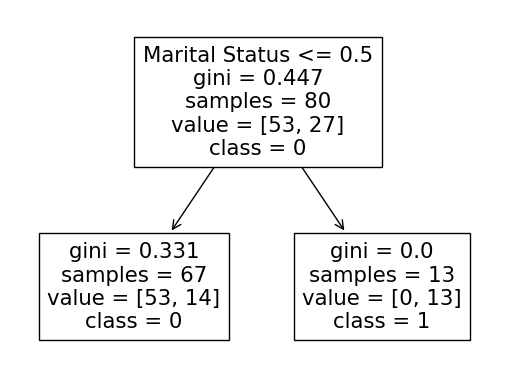

In [ ]:
plot_tree(clf,feature_names = ["Marital Status"],class_names =["0","1"])

**[# Out of 80 non depressed,{class 0} the model predicts 67 samples correctly as non depressed and 13 samples as depressed which is error ] **bold text**

**BUILDING PREDICTIVE SYSTEM USING DECISION TREES**

In [ ]:
input_data = (0)
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(-1,1)
prediction = clf.predict(input_data_reshaped)
print(prediction)

if prediction[0]== 0:
  print("The student does not have depression")
else:
  print("The student has depression")

[0]
The student does not have depression


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
